In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#Import Dataset
df = pd.read_excel("train.xlsx")

In [3]:
#Convert excel file to csv
df.to_csv("train.csv",index=None,header=True)

In [4]:
#Checking Dimension of Dataframe
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df = df.replace(' ', np.nan)

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.fillna(df.mean())

C:\Users\HP\AppData\Local\Temp/ipykernel_4264/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# Convert String values (Yes and No) of Churn column to 1 and 0
df['Churn'] = df['Churn'].replace({'Yes': 1,'No': 0})

In [14]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [15]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [16]:
# Convert 'No internet service' to 'No' for the below mentioned columns
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']
for i in cols : 
    df[i]  = df[i].replace("No internet service","No")

In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# Visualization

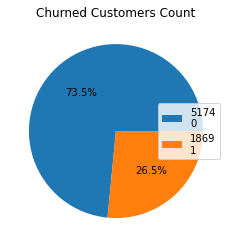

In [18]:
counts = df['Churn'].value_counts()

# Plot pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%')

# Add count values as labels
labels = [f"{count}\n{value}" for value, count in counts.items()]
ax.legend(wedges, labels, loc='right')

# Add title
ax.set_title('Churned Customers Count')

# Show plot
plt.show()

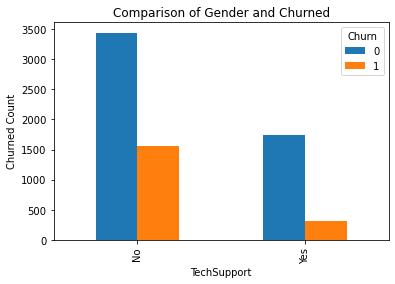

In [19]:
contingency_table = pd.crosstab(df['TechSupport'], df['Churn'])

# Plot grouped bar chart
contingency_table.plot.bar()

# Add labels and title
plt.xlabel('TechSupport')
plt.ylabel('Churned Count')
plt.title('Comparison of Gender and Churned')

# Show plot
plt.show()

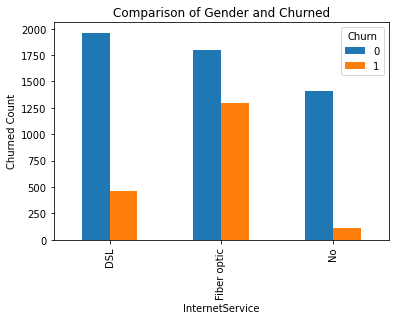

In [20]:
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# Plot grouped bar chart
contingency_table.plot.bar()

# Add labels and title
plt.xlabel('InternetService')
plt.ylabel('Churned Count')
plt.title('Comparison of Gender and Churned')

# Show plot
plt.show()

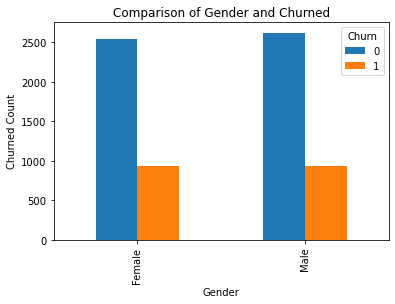

In [21]:
contingency_table = pd.crosstab(df['gender'], df['Churn'])

# Plot grouped bar chart
contingency_table.plot.bar()

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Churned Count')
plt.title('Comparison of Gender and Churned')

# Show plot
plt.show()

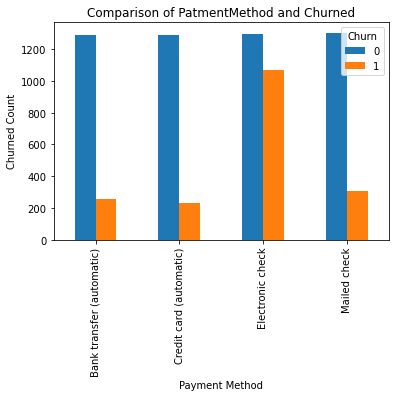

In [22]:
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Plot grouped bar chart
contingency_table.plot.bar()

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Churned Count')
plt.title('Comparison of PatmentMethod and Churned')

# Show plot
plt.show()

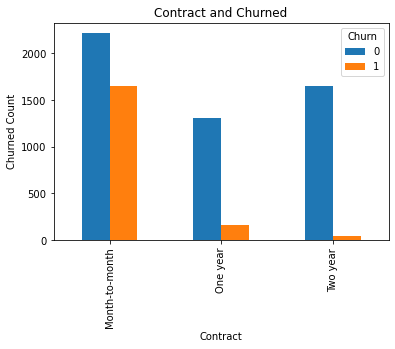

In [23]:
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Plot grouped bar chart
contingency_table.plot.bar()

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Churned Count')
plt.title('Contract and Churned')

# Show plot
plt.show()

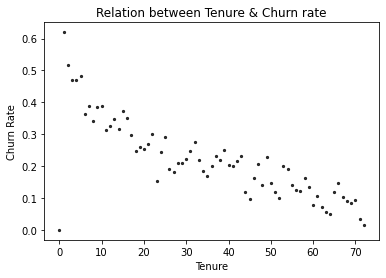

In [24]:
# create a scatter plot
plot_by_tenure = df.groupby('tenure').Churn.mean().reset_index()

# create scatter plot
plt.scatter(plot_by_tenure['tenure'], plot_by_tenure['Churn'], s=5, c='black', alpha=0.8)

# add labels and title
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Relation between Tenure & Churn rate')

# display the plot
plt.show()

In [25]:
df = pd.get_dummies(df, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)#Prevent multicolinearity

In [26]:
#Perform Feature Scaling and One Hot Encoding
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
#scaler = StandardScaler()
#cols_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
#df[cols_for_scaling] = scaler.fit_transform(df[cols_for_scaling])

In [27]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [28]:
#Number of columns increased and have suffixes attached, as a result of get_dummies method.
df.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_Yes', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [29]:
df.shape

(7043, 26)

In [30]:
#Create Feature variable X and Target variable y
y = df['Churn']
X = df.drop(['Churn','customerID'], axis = 1)

In [31]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
logmodel_accuracy

80.27

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
dt_accuracy

72.12

In [34]:
import pickle

In [35]:
pickle.dump(logmodel,open('logmodel.pkl','wb'))
#pickle.dump(scaler,open('scaler.pkl','wb'))

In [38]:
X.columns.values

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'Dependents_Yes', 'DeviceProtection_Yes',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_Yes', 'OnlineSecurity_Yes', 'PaperlessBilling_Yes',
       'Partner_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes'], dtype=object)

In [44]:
df = pd.DataFrame(X_train)

In [45]:
y_train

2503    0
3821    1
4784    0
4785    1
1670    1
       ..
2014    0
6253    0
1931    0
5600    1
5808    0
Name: Churn, Length: 4930, dtype: int64

In [43]:
df.to_csv('save.csv',index=False)